In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
d=pd.read_csv('Demographics.csv')
p=pd.read_csv('Products.csv')
t=pd.read_csv('Transactions.csv')
s=pd.read_csv('StorePromotions.csv')

In [3]:
t.shape,d.shape,p.shape,s.shape

((261507, 4), (5908, 7), (3449, 2), (1740, 5))

In [4]:
t.Product_ID.shape,t.User_ID.shape

((261507,), (261507,))

In [5]:
d.User_ID.shape

(5908,)

In [6]:
t.dtypes

Date          object
User_ID        int64
Product_ID    object
Purchase       int64
dtype: object

In [7]:
t_merge=pd.merge(t,p,on='Product_ID',how='left')

In [8]:
t_merge

,Date,User_ID,Product_ID,Purchase,Product_Category
0,28-9-2018,1000001,P00069042,837,3
1,29-7-2018,1000001,P00117942,884,4
2,28-7-2018,1000001,P00258742,691,4
3,27-7-2018,1000001,P00142242,788,7
4,29-7-2018,1000001,P00297042,784,7
...,...,...,...,...,...
261502,12-9-2018,1007092,P1003112,2500,11
261503,7-9-2018,1007095,P1003381,1750,11
261504,3-7-2018,1007099,P00250642,593,10
261505,4-8-2018,1007099,P00023142,704,4


In [9]:
#t_merge['Date']=pd.to_datetime(t_merge['Date'])

In [10]:
#t_merge['Week_Number'] = t_merge['Date'].dt.week

In [11]:
t_merge

,Date,User_ID,Product_ID,Purchase,Product_Category
0,28-9-2018,1000001,P00069042,837,3
1,29-7-2018,1000001,P00117942,884,4
2,28-7-2018,1000001,P00258742,691,4
3,27-7-2018,1000001,P00142242,788,7
4,29-7-2018,1000001,P00297042,784,7
...,...,...,...,...,...
261502,12-9-2018,1007092,P1003112,2500,11
261503,7-9-2018,1007095,P1003381,1750,11
261504,3-7-2018,1007099,P00250642,593,10
261505,4-8-2018,1007099,P00023142,704,4


In [12]:
#tsum=t.groupby('User_ID').agg({'Product_ID':'count','Purchase':'sum'})

In [13]:
tmean=t_merge.groupby(['User_ID']).agg({'Product_ID':'count','Purchase':'sum'})

In [14]:
tmean

,Product_ID,Purchase
User_ID,,
1000001,12,9979
1000002,37,28416
1000003,10,7329
1000005,55,38641
1000006,19,14162
...,...,...
1007081,1,3550
1007091,4,5701
1007092,2,6050


In [15]:
tmean.dtypes

Product_ID    int64
Purchase      int64
dtype: object

In [16]:
tmean.reset_index(inplace=True)

In [17]:
tmean.rename(columns = {"Product_ID": "Product_count"},inplace=True)

In [18]:
tmean

,User_ID,Product_count,Purchase
0,1000001,12,9979
1,1000002,37,28416
2,1000003,10,7329
3,1000005,55,38641
4,1000006,19,14162
...,...,...,...
5880,1007081,1,3550
5881,1007091,4,5701
5882,1007092,2,6050
5883,1007095,1,1750


In [19]:
tpd_merge=pd.merge(tmean,d,on='User_ID',how='left')

In [20]:
tpd_merge.shape

(5893, 9)

In [21]:
tpd_merge.drop_duplicates(subset=None,keep='first',inplace=True)

In [22]:
tpd_merge

,User_ID,Product_count,Purchase,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,12,9979,F,15.0,10,A,2,0
1,1000002,37,28416,M,69.0,16,C,4+,0
2,1000003,10,7329,M,34.0,15,A,3,0
3,1000005,55,38641,M,27.0,20,A,1,1
4,1000006,19,14162,F,51.0,9,A,1,0
...,...,...,...,...,...,...,...,...,...
5888,1007081,1,3550,F,NaN,17,B,4+,0
5889,1007091,4,5701,M,40.0,8,C,4+,1
5890,1007092,2,6050,M,45.0,8,C,4+,1
5891,1007095,1,1750,M,41.0,8,C,4+,1


In [23]:
tpd_merge.isnull().sum()

User_ID                       0
Product_count                 0
Purchase                      0
Gender                        0
Age                           3
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
dtype: int64

In [24]:
tpd_merge.dropna(inplace=True)

In [25]:
tpd_merge.dtypes

User_ID                         int64
Product_count                   int64
Purchase                        int64
Gender                         object
Age                           float64
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
dtype: object

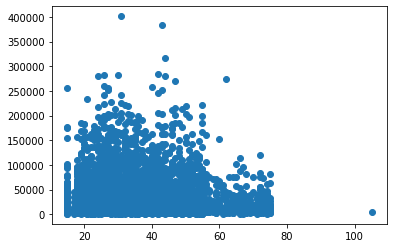

In [26]:
plt.scatter(tpd_merge.Age,tpd_merge.Purchase)

In [27]:
#tpd_merge.drop('Age',axis=1,inplace=True)

In [28]:
tpd_merge

,User_ID,Product_count,Purchase,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,12,9979,F,15.0,10,A,2,0
1,1000002,37,28416,M,69.0,16,C,4+,0
2,1000003,10,7329,M,34.0,15,A,3,0
3,1000005,55,38641,M,27.0,20,A,1,1
4,1000006,19,14162,F,51.0,9,A,1,0
...,...,...,...,...,...,...,...,...,...
5885,1006040,83,63846,F,48.0,0,B,4+,1
5889,1007091,4,5701,M,40.0,8,C,4+,1
5890,1007092,2,6050,M,45.0,8,C,4+,1
5891,1007095,1,1750,M,41.0,8,C,4+,1


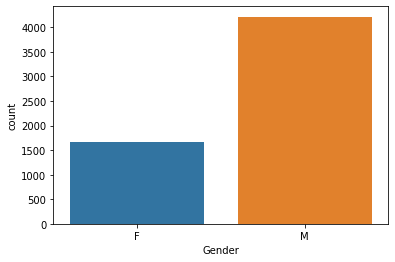

In [29]:
sns.countplot(tpd_merge.Gender)

In [30]:
#cols=['Occupation','Marital_Status']

In [31]:
for cols in ['Occupation','Marital_Status','Gender','City_Category','Stay_In_Current_City_Years']:
    tpd_merge[cols]=tpd_merge[cols].astype('category')

In [32]:
#tpd_merge.dtypes

In [33]:
x = tpd_merge.copy().drop("Purchase",axis=1)
y = pd.DataFrame(tpd_merge["Purchase"])

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=132)

In [35]:
for cols in ['Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']:
    x_train[cols]=x_train[cols].cat.codes


C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
x_train

,User_ID,Product_count,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
5016,1005148,27,M,31.0,20,1,2,1
4974,1005105,25,M,51.0,7,2,1,1
1510,1001551,57,M,35.0,11,1,1,1
3983,1004087,9,M,15.0,4,2,1,0
222,1000221,8,F,35.0,0,1,2,1
...,...,...,...,...,...,...,...,...
4206,1004319,14,M,36.0,7,2,2,1
1721,1001766,10,F,50.0,0,2,0,1
4185,1004297,19,M,50.0,15,1,3,1
3906,1004009,54,M,20.0,7,2,4,0


In [37]:
x_train['Gender']=x_train['Gender'].cat.codes

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
x_train

,User_ID,Product_count,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
5016,1005148,27,1,31.0,20,1,2,1
4974,1005105,25,1,51.0,7,2,1,1
1510,1001551,57,1,35.0,11,1,1,1
3983,1004087,9,1,15.0,4,2,1,0
222,1000221,8,0,35.0,0,1,2,1
...,...,...,...,...,...,...,...,...
4206,1004319,14,1,36.0,7,2,2,1
1721,1001766,10,0,50.0,0,2,0,1
4185,1004297,19,1,50.0,15,1,3,1
3906,1004009,54,1,20.0,7,2,4,0


In [39]:
x_train.dtypes

User_ID                         int64
Product_count                   int64
Gender                           int8
Age                           float64
Occupation                       int8
City_Category                    int8
Stay_In_Current_City_Years       int8
Marital_Status                   int8
dtype: object

In [40]:
for cols in ['Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']:
    x_test[cols]=x_test[cols].cat.codes


C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
x_test['Gender']=x_test['Gender'].cat.codes

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
x_test.dtypes

User_ID                         int64
Product_count                   int64
Gender                           int8
Age                           float64
Occupation                       int8
City_Category                    int8
Stay_In_Current_City_Years       int8
Marital_Status                   int8
dtype: object

In [43]:
sc=StandardScaler()
cols_to_norm = ['Age','Product_count']
x_train[cols_to_norm] = sc.fit_transform(x_train[cols_to_norm])

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SivaKumar\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [44]:
x_train

,User_ID,Product_count,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
5016,1005148,-0.324121,1,-0.376010,20,1,2,1
4974,1005105,-0.361051,1,1.163635,7,2,1,1
1510,1001551,0.229829,1,-0.068081,11,1,1,1
3983,1004087,-0.656491,1,-1.607726,4,2,1,0
222,1000221,-0.674956,0,-0.068081,0,1,2,1
...,...,...,...,...,...,...,...,...
4206,1004319,-0.564166,1,0.008901,7,2,2,1
1721,1001766,-0.638026,0,1.086652,0,2,0,1
4185,1004297,-0.471841,1,1.086652,15,1,3,1
3906,1004009,0.174434,1,-1.222815,7,2,4,0


In [45]:
x_test[cols_to_norm] = sc.transform(x_test[cols_to_norm])

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SivaKumar\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [46]:
x_test

,User_ID,Product_count,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
2537,1002607,-0.527236,0,1.702510,0,2,0,0
96,1000096,-0.490306,0,-0.606957,16,2,2,1
1953,1002006,-0.674956,1,0.470794,0,0,1,1
1068,1001101,1.651635,1,0.470794,1,0,1,0
1965,1002018,1.928610,1,0.162865,16,1,1,0
...,...,...,...,...,...,...,...,...
2554,1002625,-0.397981,1,0.547777,7,2,3,0
732,1000751,-0.711886,0,-0.068081,17,2,3,0
2138,1002194,-0.601096,1,-0.376010,17,2,3,0
365,1000368,0.949965,1,-0.068081,0,2,1,0


# lm 

In [47]:
#from sklearn.linear_model import LinearRegression

In [48]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import statsmodels.api as sm


In [49]:
#lm=LinearRegression()
#lm.fit(x_train,y_train)

In [50]:
#train_pred=lm.predict(x_train)

In [51]:
#test_pred=lm.predict(x_test)

In [52]:
#print("coefficients:",lm.coef_)
#print("coefficients",lm.intercept_)

In [53]:
#rmse_train=sqrt(mean_squared_error(y_train,train_pred))
#rmse_test=sqrt(mean_squared_error(y_test,test_pred))

In [54]:
#rmse_train,rmse_test

In [55]:
#mse_train=mean_squared_error(y_train,train_pred)
#mse_test=mean_squared_error(y_test,test_pred)

In [56]:
#mse_train,mse_test

In [57]:
#mape_train=np.mean(np.abs((y_train-train_pred)/y_train))*100

In [58]:
#mape_test=np.mean(np.abs((y_test-test_pred)/y_test))*100

In [59]:
#mape_train

In [60]:
#mape_test

In [61]:
#print("The R2 value on test dataset: {} \n".format(r2_score(y_pred=test_pred, y_true=y_test)))

#print("The R2 value on train dataset: {} \n".format(r2_score(y_pred=train_pred, y_true=y_train)))

#print("The Mean Squared Error on train dataset: {} \n".format(mean_squared_error(y_pred=train_pred,y_true=y_train)))

#print("The Mean Squared Error on test dataset: {} \n".format(mean_squared_error(y_pred=test_pred,y_true=y_test)))

In [62]:
#sns.boxplot(y_train)

In [63]:
#results = sm.OLS(y_train,x_train).fit()

In [64]:
#results.summary()

# logistic

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix


In [66]:
IQR=tpd_merge['Purchase'].quantile(0.75)-tpd_merge['Purchase'].quantile(0.25)

In [67]:
ow=tpd_merge['Purchase'].quantile(0.75)+1.5*IQR
ow

91338.875

In [68]:
tpd_merge.head()

,User_ID,Product_count,Purchase,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,12,9979,F,15.0,10,A,2,0
1,1000002,37,28416,M,69.0,16,C,4+,0
2,1000003,10,7329,M,34.0,15,A,3,0
3,1000005,55,38641,M,27.0,20,A,1,1
4,1000006,19,14162,F,51.0,9,A,1,0


In [69]:
tpd_merge.Purchase[tpd_merge.Purchase<ow]=0

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
tpd_merge.Purchase[tpd_merge.Purchase>=ow]=1

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
tpd_merge.head(20)

,User_ID,Product_count,Purchase,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,12,0,F,15.0,10,A,2,0
1,1000002,37,0,M,69.0,16,C,4+,0
2,1000003,10,0,M,34.0,15,A,3,0
3,1000005,55,0,M,27.0,20,A,1,1
4,1000006,19,0,F,51.0,9,A,1,0
5,1000007,2,0,M,37.0,1,B,1,1
6,1000008,49,0,M,34.0,12,C,4+,1
7,1000009,29,0,M,30.0,17,C,0,0
8,1000010,122,1,F,44.0,1,B,4+,1
9,1000011,40,0,F,30.0,1,C,1,0


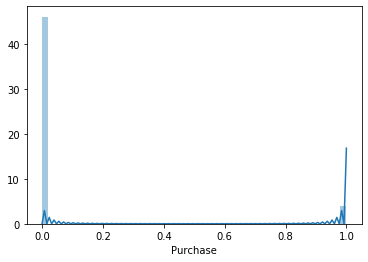

In [72]:
sns.distplot(tpd_merge.Purchase)

In [73]:
tpd_merge.Purchase.value_counts()

0    5415
1     467
Name: Purchase, dtype: int64

In [74]:
x = tpd_merge.copy().drop("Purchase",axis=1)
y = tpd_merge["Purchase"]

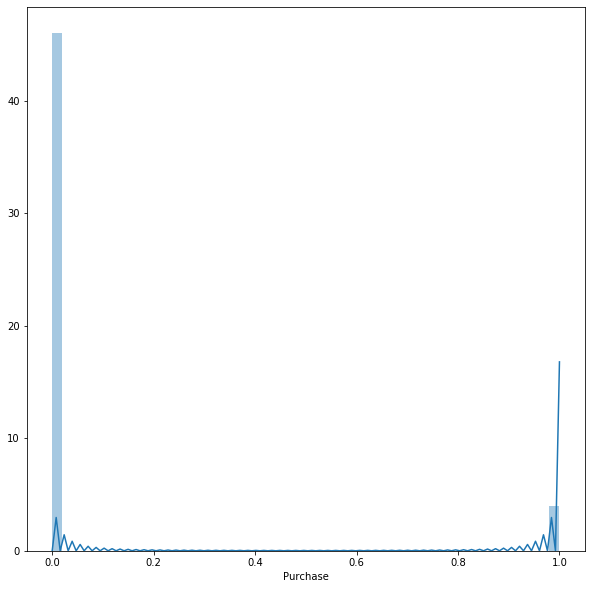

In [75]:
plt.figure(figsize=(10,10))
sns.distplot(y)

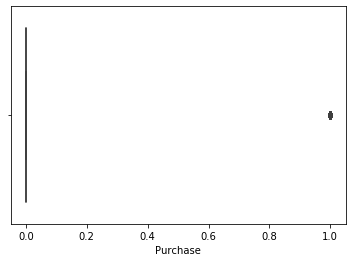

In [76]:
sns.boxplot(y)

In [77]:
y.dtypes

dtype('int64')

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=200)

In [79]:
pd.DataFrame(y_train).Purchase.value_counts()

0    4351
1     354
Name: Purchase, dtype: int64

In [80]:
y_test.dtypes

dtype('int64')

In [81]:
for cols in ['Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']:
    x_train[cols]=x_train[cols].cat.codes


C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
for cols in ['Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']:
    x_test[cols]=x_test[cols].cat.codes


C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [83]:
x_train['Gender']=x_train['Gender'].cat.codes

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
x_test['Gender']=x_test['Gender'].cat.codes

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
y_train.value_counts()

0    4351
1     354
Name: Purchase, dtype: int64

In [86]:
sc=StandardScaler()
cols_to_norm = ['Age','Product_count']
x_train[cols_to_norm] = sc.fit_transform(x_train[cols_to_norm])

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SivaKumar\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [87]:
x_test[cols_to_norm] = sc.transform(x_test[cols_to_norm])

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SivaKumar\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
lom=LogisticRegression()

In [90]:
lom.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
train_pred=lom.predict(x_train)

In [92]:
test_pred=lom.predict(x_test)

In [93]:
y_test.value_counts()

0    1064
1     113
Name: Purchase, dtype: int64

In [94]:
accuracy_score(y_train,train_pred)

0.9247608926673752

In [95]:
accuracy_score(y_test,test_pred)

0.9039932030586236

In [96]:
confusion_matrix(y_train,train_pred)

array([[4351,    0],
       [ 354,    0]], dtype=int64)

In [97]:
confusion_matrix(y_test,test_pred)

array([[1064,    0],
       [ 113,    0]], dtype=int64)

In [98]:
classification_report(y_test,test_pred)

C:\Users\SivaKumar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.90      1.00      0.95      1064\n           1       0.00      0.00      0.00       113\n\n    accuracy                           0.90      1177\n   macro avg       0.45      0.50      0.47      1177\nweighted avg       0.82      0.90      0.86      1177\n'

In [99]:
y_test.head(20)

4305    0
532     0
2097    0
3370    0
3592    0
2984    0
876     0
111     0
5446    0
4460    0
2030    0
3381    0
5503    0
1097    0
2309    0
3055    0
1303    0
369     0
37      0
5386    1
Name: Purchase, dtype: int64